In [23]:
import pandas as pd
from PIL import Image


In [29]:
def import_and_augment_df(path, data_path):
    df = pd.read_csv(path, sep='\t', index_col=False,  )
    df['image_height'] = [Image.open(f'{data_path}/{id_}.png').height for id_ in df['id']]
    df['cer'] = df['chars_distance']/df['chars']
    return df.sort_values(['id'], ignore_index=True)

In [30]:
df = import_and_augment_df(path= '/Users/sven/Desktop/ocr_xps/results/2a9hJ6_base_gr_lines_psm7/evaluation/error_record.tsv',
                           data_path = '/Users/sven/Desktop/ocr_xps/data/ajmc_gr_lines')

df

,id,gt,ocr,chars,chars_distance,words,words_distance,image_height,cer
0,Wecklein1894_0016_33,"ἔνδον γὰρ ἁνὴρ ἄρτι τυγχάνει, κάρα","ἔνδον γὰρ ἅἄἅνηρ ἄοτι τυγγχάγει, κάρα",34,7,6,3,81,0.205882
1,Wecklein1894_0016_34,καί σ’ οὐδὲν εἴσω τῆσδε παπταίνειν πύλης,καί σ’ οὐδὲν εἴσω τῆσδε παπταίνειν πύλης,40,0,7,0,83,0.000000
2,Wecklein1894_0016_35,στάζων ἱδρῶτι καὶ χέρας ξιφοκτόνους.,στάζων ἱδρῶτι καὶ γέοας ξιφοκτόγους.,36,3,5,2,82,0.083333
3,Wecklein1894_0016_36,"ὡς εὐμαθές σου, κἂν ἄποπτος ᾖς ὅμως,","ὡς εὐμαϑές σου, κἂν ἄποπτος ἧς ὅμως,",36,2,7,2,82,0.055556
4,Wecklein1894_0016_37,φώνημ’ ἀκούω καὶ ξυναρπάζω φρενὶ,φώνημ’ ἀκούω καὶ ξυναρπάζω φρενὶ,32,0,5,0,83,0.000000
...,...,...,...,...,...,...,...,...,...
600,sophokle1v3soph_0140_34,κλύειν τὸν ἐσθλὸν ἄνδρα χρὴ τῶν ἐν τέλει.,κλύειν τὸν ἐσθλὸν ἀνδρα χρὴ τῶν ἐν τέλει.,41,1,8,1,78,0.024390
601,sophokle1v3soph_0140_36,"ἦ κάρτα πολλοὶ νῦν φίλοι, καὖθις πικροί.","ἢ χάρτα πολλοὶ νῦν φίλοι, καύϑις πιχροί.",40,5,7,4,79,0.125000
602,sophokle1v3soph_0140_38,σκληρὰν ἐπαινεῖν οὐ φιλῶ ψυχὴν ἐγώ.,σχληρὰν ἑπαινξῖν οὐ φιλῶ τνυχὴν ἐγω.,35,6,6,4,77,0.171429
603,sophokle1v3soph_0140_39,"παῖσαι· κρατεῖς τοι, τῶν φίλων νικώμενος.","γγαῦσαι"" χρατεῖς τοι, τῶν φίλων νικώμενος.",41,5,6,2,71,0.121951


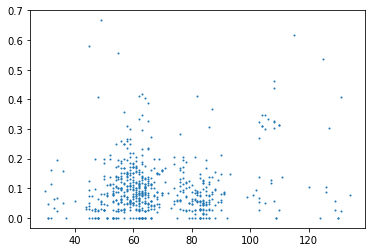

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df['image_height'], df['cer'],s=1)
plt.show()

# resize25

In [32]:
df_25 = import_and_augment_df(path='/Users/sven/Desktop/ocr_xps/results/2aagmv_base_gr_lines_psm7_rsz25/evaluation/error_record.tsv',
                                 data_path = '/Users/sven/Desktop/ocr_xps/data/ajmc_gr_lines_rsz25')

In [34]:
assert all(df['id'] == df_25['id'])

True

In [35]:
df_better = df[df_25['chars_distance']< df['chars_distance']]
df_worse = df[df_25['chars_distance']> df['chars_distance']]

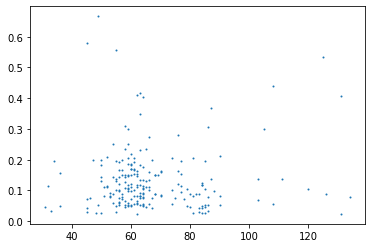

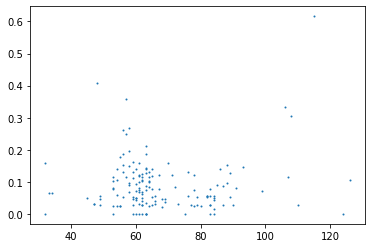

In [37]:
plt.scatter(df_better['image_height'], df_better['cer'],s=1)
plt.show()
plt.scatter(df_worse['image_height'], df_worse['cer'],s=1)
plt.show()

In [38]:
df_better.sort_values(['cer'], ascending=False).head(20)

,id,gt,ocr,chars,chars_distance,words,words_distance,image_height,cer
85,bsb10234118_0023_1,ΑΙΑΣ ΜΑΣΤΙΓΟΦΟΡΟΣ.,“4.7Α4Σ ΜΑΣΊΤΊΤ)ΠΓΟΦΟΡΟ Σ.,18,12,2,3,49,0.666667
191,bsb10234118_0042_35,Σ Ο Φ Ο Κ Λ Ε Ο Υ Σ,ΣΟΘΟΦΟΕΙΒΛΕΟΥΣ,19,11,10,10,45,0.578947
134,bsb10234118_0027_19,ΟΔΥΣΣΕΥΣ. ΔΥΣΣΕΥΣ.,ΟΔΦΥΣΣΕΎΥΣ.,18,10,2,2,55,0.555556
435,sophoclesplaysa05campgoog_0146_80,3 μόνοι ἔτ’ ἐμμένοντες ὀρθοῷ όμῳ.,"8 μόνοι Γι ἐμμένοντες ὀρθῳ νόμῳ,",43,23,6,6,125,0.534884
397,sophoclesplaysa05campgoog_0112_80,ἢ δρᾶν ἀμείνων ηὑρέθη τὰ καίρια;,ἡ ὁρᾶν ἀμείνων ηνυρέθη τὰ καίρια;,41,18,6,6,108,0.439024
429,sophoclesplaysa05campgoog_0146_22,γινομένοισι τῷ μὲν ἡ Ἀφροδίτη τῷ δὲ ὁ,γιγνομένοισι τῳ μὲν ἡ Αφροδίτη τῳ δὲ ὁ,48,20,8,8,63,0.416667
357,sophoclesplaysa05campgoog_0050_16,"εὖ ποιεῖν, τὸν δὲ ἐχθρὸν κακῶς.","εὖ ποιεῖν, τὸν δὲ ἐχθρὸν κακῶς,",39,16,6,6,62,0.410256
393,sophoclesplaysa05campgoog_0112_48,"ΑΘ. ὁρᾷς, Ὀδυσσεῦ, τὴν θεῶν ἰσχὺν ὅση;","ΑΘ. ὁρᾷς, ᾿Οὐδυσσεῦ, τὴν θεὼν ἰσχὺν ὅση;",49,20,7,6,131,0.408163
430,sophoclesplaysa05campgoog_0146_4,τὸν Τιμομάχου..ἀπεκτονότα τἀν τῇ Τροίᾳ,τὸν Τιμομάχον. ἀπεκτονότα τὰν τῇ Τροίᾳ,47,19,5,6,64,0.404255
505,sophokle1v3soph_0048_31,"ὦ φθέγμ’ Ἀθάνας, φιλτάνης ἐμοὶ θεῶν, –","ὠ φϑέγμ’ «ϑανας, φιλτάτης ἑιιοὺ ϑεῶν, --Ξ",38,14,7,7,87,0.368421


In [42]:
df['diff'] = df['chars_distance']-df_25['chars_distance']
df['ocr_25'] = df_25['ocr']
df.sort_values(['diff'], ascending=False).head(30)

,id,gt,ocr,chars,chars_distance,words,words_distance,image_height,cer,diff,ocr_25
240,bsb10234118_0050_23,ὡς καὶ φιλήσων αὖθις· ἔς τε τὸν φίλον 680,"ὡς παἱ φιλήσων αὖϑις"" ἔς τὸ τὸν φίλν 68 ΌὉ",41,9,9,6,60,0.219512,5,"ὡς καὶ φιλήσων αὖϑις"" ἔς τὸ τὸν φίλν 680"
164,bsb10234118_0029_9,ὡς ἡμέρα κλίνει τε κἀνάγει πάλιν,ὡς γμέρα πλίνδε τὸ κανάγδε πάλιν,32,8,6,4,59,0.250000,5,ὡς γμέρα κλίνει τὸ κανάγει πάλιν
251,bsb10234118_0050_4,τῇ λευκοπώλῳ φέγγος ἡμέρᾳ φλέγειν.,τῇ λευκοπωλῷ φέγγος ἡμέρῳ φλέζγϑιν.,34,5,5,3,62,0.147059,5,τῇ λευκοπώλῳ φέγγος ἡμέρᾳ φλέγειν.
148,bsb10234118_0029_16,ὁρῶ γὰρ ἡμᾶς οὐδὲν ὄντας ἄλλο πλὴν 125,ὑρὼ γὰρ ἡμᾶς οὐδὲν ὄντας ἄλλο πλὴν 18ϑὃ,38,5,8,2,65,0.131579,5,ὁρῶ γὰρ ἡμᾶς οὐδὲν ὄντας ἄλλο πλὴν 125
85,bsb10234118_0023_1,ΑΙΑΣ ΜΑΣΤΙΓΟΦΟΡΟΣ.,“4.7Α4Σ ΜΑΣΊΤΊΤ)ΠΓΟΦΟΡΟ Σ.,18,12,2,3,49,0.666667,5,471. Σ ΜΑΣ ΤΠΓΟΦΟΡΟΣ.
217,bsb10234118_0043_28,"495 τῶν σῶν ὑπ’ ἐχθρῶν, χειρίαν ἀφεὶς τινί. 490","᾿ς 409 τῶν σῶν ὑπ’ ἐχϑρῶν, χειρίαν ἀφεὶς τινί,...",47,7,9,4,69,0.148936,5,"496 τῶν σῶν ὑπ’ ἐχϑρῶν, χειρίαν ἀφεὶς τινί. 490"
101,bsb10234118_0023_6,κυνὸς Λακαίνης ὥς τις εὔρινος βάσις.,πυνος «Τακαίγης ὥς τις εὔρενος βάσις.,36,6,6,3,61,0.166667,4,κυνὸς «Ἰακαίνης ὥς τις εὔρινος βάσις.
306,cu31924087948174_0051_61,μανθάνειν οὐδέν. ΣΩ. τί δαί; | ΣΤ. ἐκεῖν’,"μανθάνειν οὖδεν. ΣΏ. τί δαὶ; ] ΣΤ, ἐκείν",41,8,8,6,34,0.195122,4,μανθάνειν οὖδεν. ΣΏ. τί δαί; 1 ΣΤ. ἐκεῖν’
236,bsb10234118_0050_2,640 πρὸς τῆςδε τῆς γυναικός· οἰκτείρω δέ νιν,"᾿ς 640 προς τῆςδε τῆς γυναιίκος"" οἰκτείρω δέ νι»",44,8,8,4,60,0.181818,4,"640 προς τῆςδε τῆς γυναικὸς"" οἰχτείρω δέ νιν"
259,bsb10234118_0067_10,τοιαῦθ’ ἁμαρτάνουσιν ἐν λόγοις ἔπη.,τοιαῦϑ’’ ἁμαρτανουσιν ἐν λογοῖς ἔπη.,35,5,5,3,54,0.142857,4,τοιαῦϑ’ ἁμαρτάνουσιν ἐν λόγοις ἔπη.


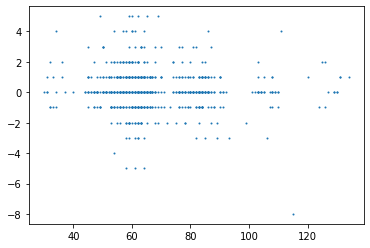

In [43]:
plt.scatter(df['image_height'], df['diff'],s=1)
plt.show()

In [45]:
import re
df['numbers'] = [len(re.findall('[0-9]', gt)) for gt in df['gt']]
df

,id,gt,ocr,chars,chars_distance,words,words_distance,image_height,cer,diff,ocr_25,numbers
0,Wecklein1894_0016_33,"ἔνδον γὰρ ἁνὴρ ἄρτι τυγχάνει, κάρα","ἔνδον γὰρ ἅἄἅνηρ ἄοτι τυγγχάγει, κάρα",34,7,6,3,81,0.205882,3,"ἔνδον γὰρ ἁνηρ ἄοτι τυγγάγει, κάρα",0
1,Wecklein1894_0016_34,καί σ’ οὐδὲν εἴσω τῆσδε παπταίνειν πύλης,καί σ’ οὐδὲν εἴσω τῆσδε παπταίνειν πύλης,40,0,7,0,83,0.000000,0,καί σ’ οὐδὲν εἴσω τῆσδε παπταίνειν πύλης,0
2,Wecklein1894_0016_35,στάζων ἱδρῶτι καὶ χέρας ξιφοκτόνους.,στάζων ἱδρῶτι καὶ γέοας ξιφοκτόγους.,36,3,5,2,82,0.083333,0,στάζων ἱδρῶτι καὶ γέοας ξιφοκτόγους.,0
3,Wecklein1894_0016_36,"ὡς εὐμαθές σου, κἂν ἄποπτος ᾖς ὅμως,","ὡς εὐμαϑές σου, κἂν ἄποπτος ἧς ὅμως,",36,2,7,2,82,0.055556,-3,"ὡς εὐμαϑές σου, κἂν ἄποπτος ῃ)ς διως,",0
4,Wecklein1894_0016_37,φώνημ’ ἀκούω καὶ ξυναρπάζω φρενὶ,φώνημ’ ἀκούω καὶ ξυναρπάζω φρενὶ,32,0,5,0,83,0.000000,-1,φώνημ’ ἀκούω καὶ ξυναοπάζω φρενὶ,0
...,...,...,...,...,...,...,...,...,...,...,...,...
600,sophokle1v3soph_0140_34,κλύειν τὸν ἐσθλὸν ἄνδρα χρὴ τῶν ἐν τέλει.,κλύειν τὸν ἐσθλὸν ἀνδρα χρὴ τῶν ἐν τέλει.,41,1,8,1,78,0.024390,-2,χλύειν τὸν ἐσϑλὸν ἀνδρα χρὴ τῶν ἐν τέλει.,0
601,sophokle1v3soph_0140_36,"ἦ κάρτα πολλοὶ νῦν φίλοι, καὖθις πικροί.","ἢ χάρτα πολλοὶ νῦν φίλοι, καύϑις πιχροί.",40,5,7,4,79,0.125000,0,"ἢ χάρτα πολλοὶ νῦν φίλοι, καύϑις πιχροί.",0
602,sophokle1v3soph_0140_38,σκληρὰν ἐπαινεῖν οὐ φιλῶ ψυχὴν ἐγώ.,σχληρὰν ἑπαινξῖν οὐ φιλῶ τνυχὴν ἐγω.,35,6,6,4,77,0.171429,0,σχληρὰν ἑπαινεῖν οὐ φιλῶ ινυ χὴν ἐγω.,0
603,sophokle1v3soph_0140_39,"παῖσαι· κρατεῖς τοι, τῶν φίλων νικώμενος.","γγαῦσαι"" χρατεῖς τοι, τῶν φίλων νικώμενος.",41,5,6,2,71,0.121951,-1,"χγαῦσαι"" χρατεῖς τοι, τῶν φίλων νιχώμενος.",0


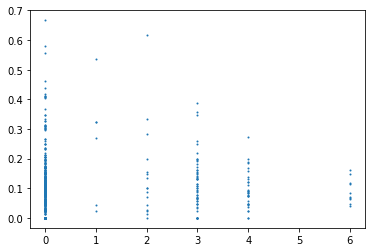

In [47]:
plt.scatter(df['numbers'], df['cer'],s=1)
plt.show()

In [51]:
import numpy as np
np.corrcoef(df['numbers'][df['numbers']> 0], df['chars_distance'][df['numbers']> 0])

array([[ 1.       , -0.2148865],
       [-0.2148865,  1.       ]])

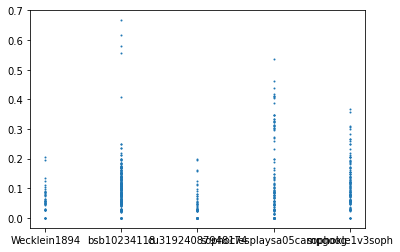

In [53]:
df['commentary'] = [id.split('_')[0] for id in df['id']]
plt.scatter(df['commentary'], df['cer'],s=1)
plt.show()